In [1]:
%matplotlib inline


# Plot multiple EMD


Shows how to compute multiple EMD and Sinkhorn with two differnt
ground metrics and plot their values for diffeent distributions.





In [2]:
# Author: Remi Flamary <remi.flamary@unice.fr>
#
# License: MIT License

import numpy as np
import matplotlib.pylab as pl
import ot
from ot.datasets import make_1D_gauss as gauss

Generate data
-------------



In [3]:
#%% parameters

n = 100  # nb bins
n_target = 50  # nb target distributions


# bin positions
x = np.arange(n, dtype=np.float64)

lst_m = np.linspace(20, 90, n_target)

# Gaussian distributions
a = gauss(n, m=20, s=5)  # m= mean, s= std

B = np.zeros((n, n_target))

for i, m in enumerate(lst_m):
    B[:, i] = gauss(n, m=m, s=5)

# loss matrix and normalization
M = ot.dist(x.reshape((n, 1)), x.reshape((n, 1)), 'euclidean')
M /= M.max()
M2 = ot.dist(x.reshape((n, 1)), x.reshape((n, 1)), 'sqeuclidean')
M2 /= M2.max()

Plot data
---------



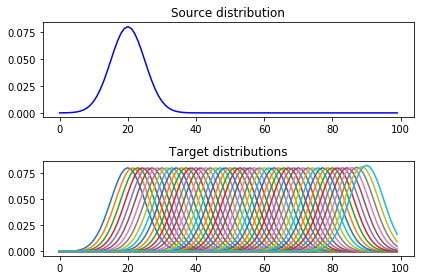

In [4]:
#%% plot the distributions

pl.figure(1)
pl.subplot(2, 1, 1)
pl.plot(x, a, 'b', label='Source distribution')
pl.title('Source distribution')
pl.subplot(2, 1, 2)
pl.plot(x, B, label='Target distributions')
pl.title('Target distributions')
pl.tight_layout()

Compute EMD for the different losses
------------------------------------



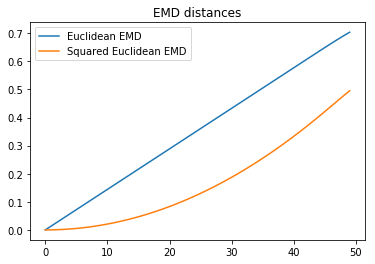

In [5]:
#%% Compute and plot distributions and loss matrix

d_emd = ot.emd2(a, B, M)  # direct computation of EMD
d_emd2 = ot.emd2(a, B, M2)  # direct computation of EMD with loss M2


pl.figure(2)
pl.plot(d_emd, label='Euclidean EMD')
pl.plot(d_emd2, label='Squared Euclidean EMD')
pl.title('EMD distances')
pl.legend()

Compute Sinkhorn for the different losses
-----------------------------------------



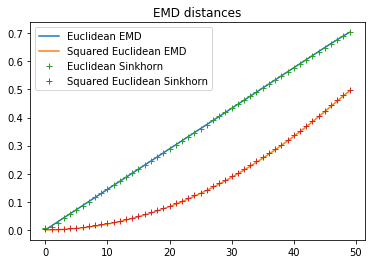

In [6]:
#%%
reg = 1e-2
d_sinkhorn = ot.sinkhorn2(a, B, M, reg)
d_sinkhorn2 = ot.sinkhorn2(a, B, M2, reg)

pl.figure(2)
pl.clf()
pl.plot(d_emd, label='Euclidean EMD')
pl.plot(d_emd2, label='Squared Euclidean EMD')
pl.plot(d_sinkhorn, '+', label='Euclidean Sinkhorn')
pl.plot(d_sinkhorn2, '+', label='Squared Euclidean Sinkhorn')
pl.title('EMD distances')
pl.legend()

pl.show()